In [1]:

# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

from sklearn.cluster import KMeans, k_means

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})



In [2]:
# Loading the data
raw_data = pd.read_csv('C://Users//user//Desktop//file python data scientis//Events Raw Data.csv')

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head()

(14783, 19)


,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


In [3]:
# Checking for null values

raw_data.isnull().sum()

CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            5
How often you attend Entertaining events in a year?               5
Social_Media                                                      5
How many hours are you willing to travel to attend an event?      5
Do you enjoy adrenaline-rush activities?                          5
Are food areas, coffee areas, bars & toilets imp

In [4]:
# Visualize the NULL observations


raw_data['Total_Household_Income'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
14778    False
14779    False
14780    False
14781    False
14782    False
Name: Total_Household_Income, Length: 14783, dtype: bool

In [5]:

# Deleting the NULL values
raw_data = raw_data.dropna(subset = ['Total_Household_Income'])

# Printing the shape
print(raw_data.shape)

# Visualize the NULL observations
raw_data.isnull().sum()

(14778, 19)


CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            0
How often you attend Entertaining events in a year?               0
Social_Media                                                      0
How many hours are you willing to travel to attend an event?      0
Do you enjoy adrenaline-rush activities?                          0
Are food areas, coffee areas, bars & toilets imp

In [6]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature CUSTOMER :14778
The number of values for feature Age :9 -- ['17 or younger' '18-20' '21-25' '26-32' '33-39' '40-49' '50-59' '60-64'
 '65 or older']
The number of values for feature Gender :2 -- ['Female' 'Male']
The number of values for feature Postcode :14674
The number of values for feature District :225
The number of values for feature Constituency :358
The number of values for feature latitude :13242
The number of values for feature longitude :13262
The number of values for feature Current_Status :8 -- ['Divorced' 'Living with partner' 'Married with children'
 'Married without children' 'Separated' 'Single, never married'
 'Step parent' 'Widowed']
The number of values for feature Total_Household_Income :8 -- ['100,000 to 149,999' '150,000 to 199,999' '20,000 to 34,999'
 '200,000 or more' '35,000 to 49,999' '50,000 to 74,999'
 '75,000 to 99,999' 'Less than 20,000']
The number of values for feature How often you attend Entertaining events in a year? :

In [7]:
# Getting the columns we need

raw_data.columns

Index(['CUSTOMER', 'Age', 'Gender', 'Postcode', 'District', 'Constituency',
       'latitude', 'longitude', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?'],
      dtype='object')

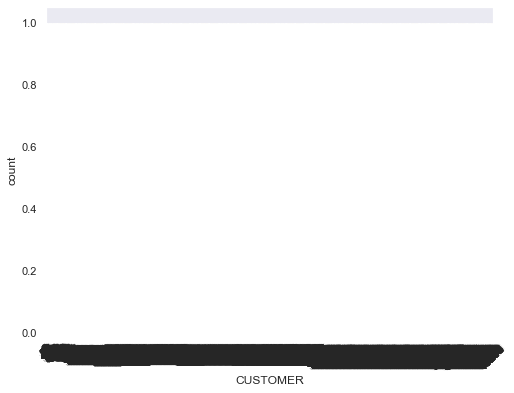

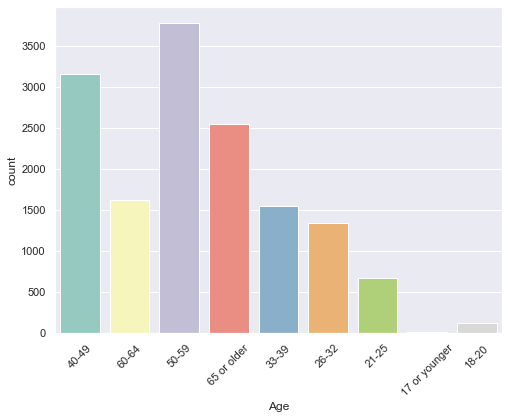

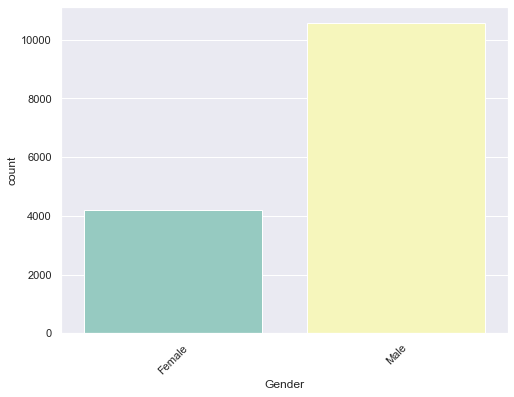

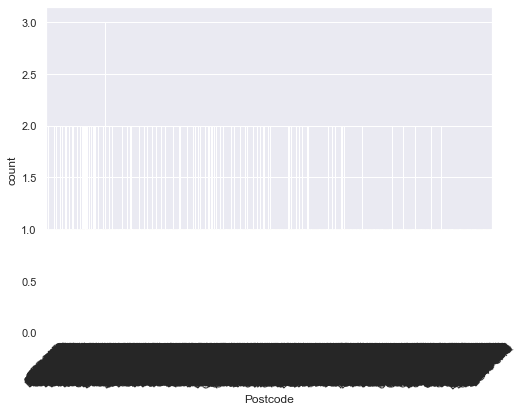

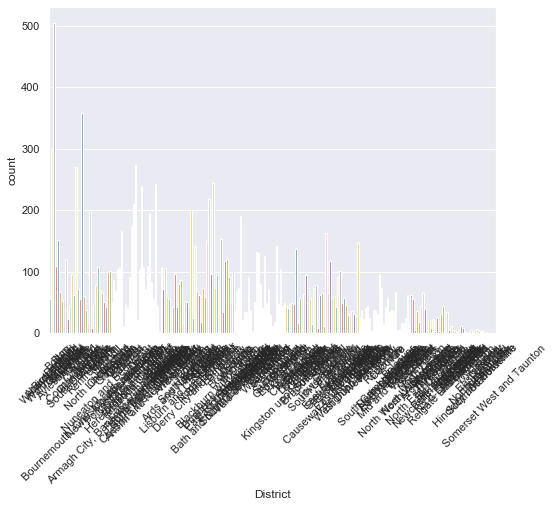

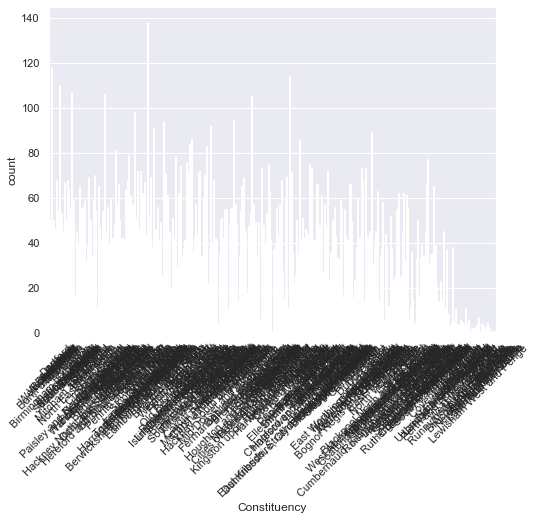

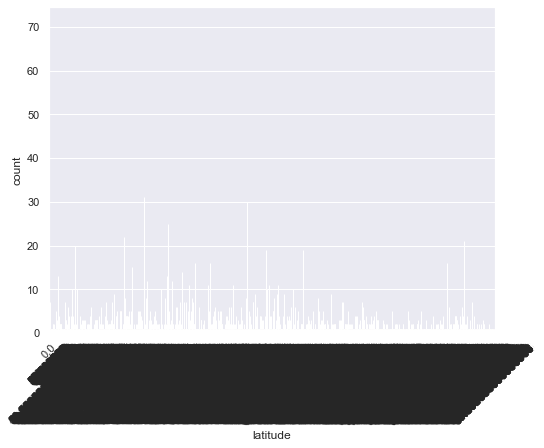

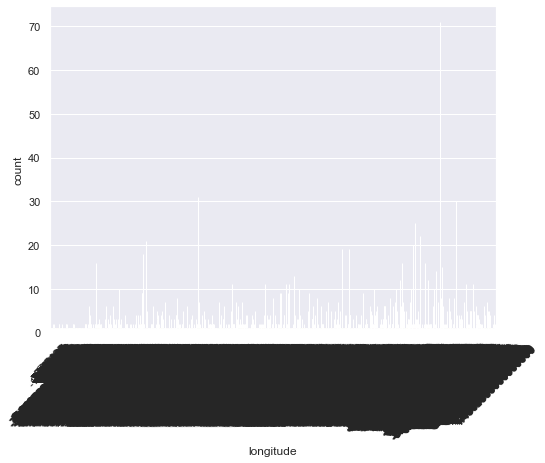

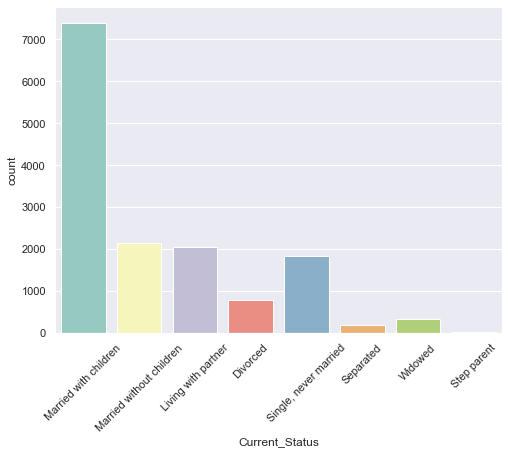

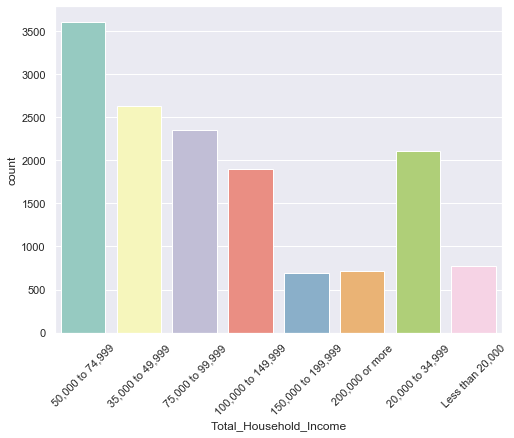

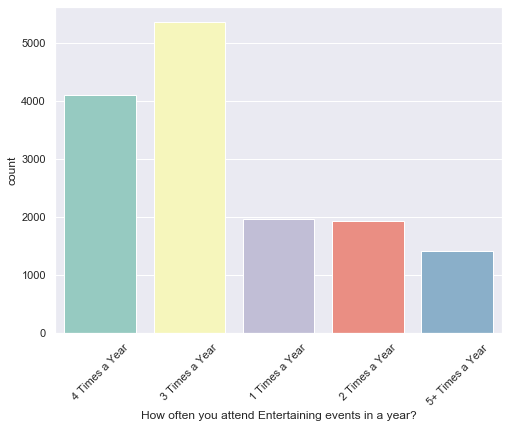

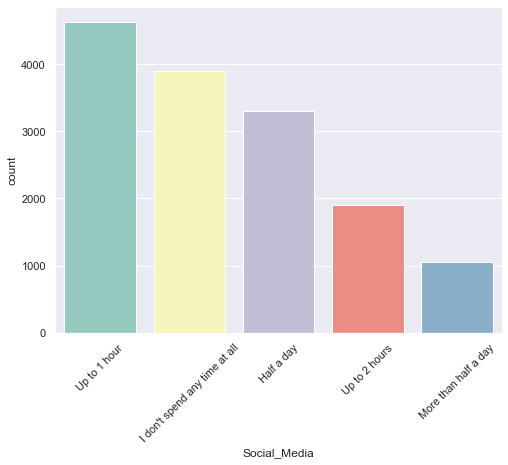

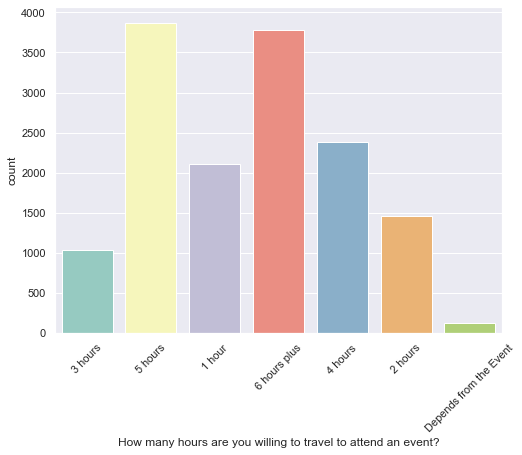

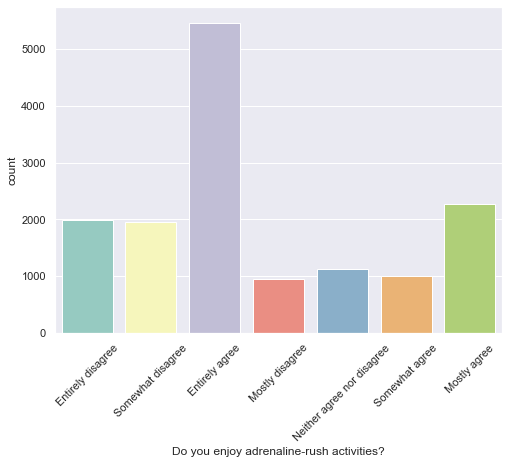

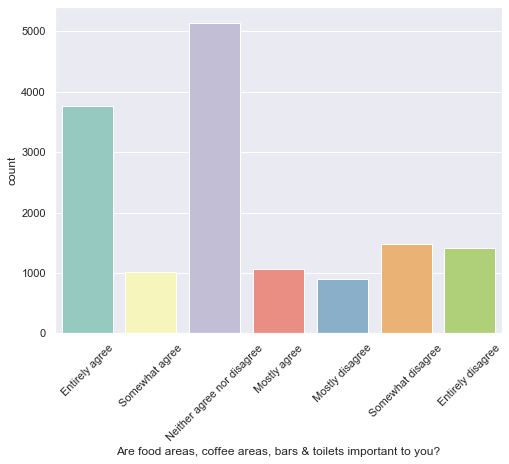

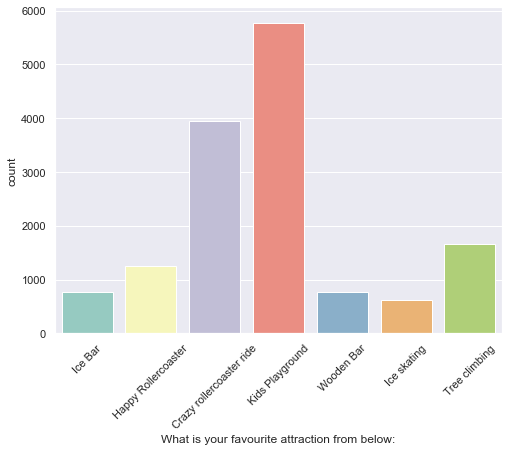

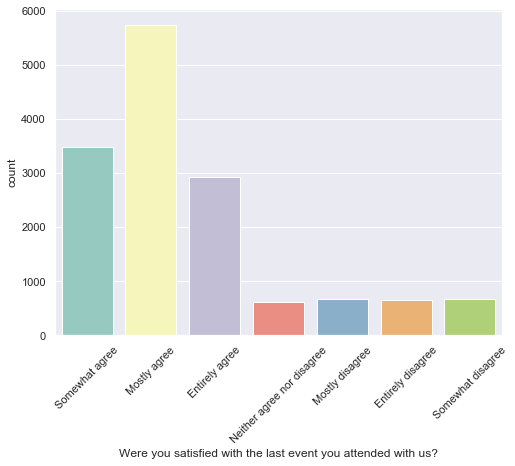

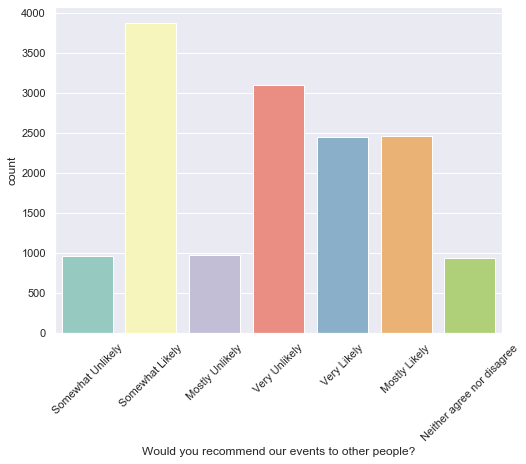

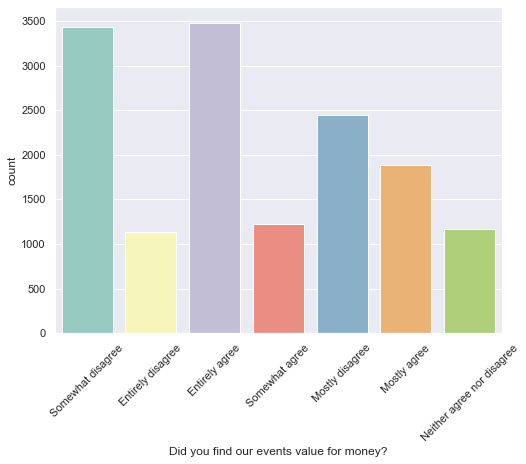

In [8]:

# Looping through all the features by our y variable - see if there is relationship

features = ['CUSTOMER', 'Age', 'Gender', 'Postcode', 'District', 'Constituency',
       'latitude', 'longitude', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?']

for f in features:
    sns.countplot(x = f, data = raw_data, palette = 'Set3')# hue = 'Good Loan')
    plt.xticks(rotation=45)
    plt.show()

# Feature Engineering - Creating a distance metric

In [9]:
# Creating a distance function - took this ready from the web

 
def haversine_vectorize(lon1, lat1, lon2, lat2):
 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
 
    newlon = lon2 - lon1
    newlat = lat2 - lat1
 
    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2
 
    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [10]:
# Creating lat and long for our event - randoms

raw_data['Event Lat'] = '51.5073'
raw_data['Event Lon'] = '0.1657'


haversine_vectorize(raw_data['Event Lon'].astype(float) ,raw_data['Event Lat'].astype(float),raw_data['longitude'].astype(float) ,
                   raw_data['latitude'].astype(float))


raw_data['Distance from Event'] = haversine_vectorize(raw_data['Event Lon'].astype(float) ,raw_data['Event Lat'].astype(float),raw_data['longitude'].astype(float) ,
                   raw_data['latitude'].astype(float))

# Feature Engingeering - Numberic Representation

In [11]:
# Making categorical variables into numeric representation

print(raw_data.shape)

# keeping the columns we need - Drop the location columns for now, as we do not want them to impact our results (for now)
raw_data = raw_data[features]
print(raw_data.shape)

# Making categorical variables into numeric representation
new_raw_data = pd.get_dummies(raw_data, columns = features)

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

print(new_raw_data.shape)
# print the shape

new_raw_data.head()

(14778, 22)
(14778, 19)
(14778, 56625)


,CUSTOMER_1,CUSTOMER_2,CUSTOMER_3,CUSTOMER_4,CUSTOMER_5,CUSTOMER_6,CUSTOMER_7,CUSTOMER_8,CUSTOMER_9,CUSTOMER_10,...,Would you recommend our events to other people?_Somewhat Unlikely,Would you recommend our events to other people?_Very Likely,Would you recommend our events to other people?_Very Unlikely,Did you find our events value for money?_Entirely agree,Did you find our events value for money?_Entirely disagree,Did you find our events value for money?_Mostly agree,Did you find our events value for money?_Mostly disagree,Did you find our events value for money?_Neither agree nor disagree,Did you find our events value for money?_Somewhat agree,Did you find our events value for money?_Somewhat disagree
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [12]:

raw_data.head()

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


In [13]:
# Running Kmeans

X_train = new_raw_data.values

# We wills start with 5 clusters

kmeans = KMeans(n_clusters=5, random_state=540)
kmeans = kmeans.fit(X_train)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia is: ", kmeans.inertia_)

MemoryError: Unable to allocate 6.23 GiB for an array with shape (14778, 56625) and data type float64

In [ ]:
kmeans.labels_.shape

In [ ]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

In [ ]:
no_of_clusters

In [ ]:
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [ ]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"])

# display
countscldf

In [ ]:
kmeans.labels_

In [ ]:
predictions

In [ ]:
new_raw_data.shape

In [ ]:

X.shape
X_r.shape

In [ ]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

In [ ]:

# Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))
print("Variance explain with 53 n_compononets: ", sum(a["Explained Variance"][0:53]))
print("Variance explain with 55 n_compononets: ", sum(a["Explained Variance"][0:55]))
print("Variance explain with 60 n_compononets: ", sum(a["Explained Variance"][0:60]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(53,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('53 eigenvectors used to explain 95% variance', xy=(53, pca.explained_variance_ratio_[53]), 
             xytext=(58, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

In [ ]:
# Running PCA again

pca = PCA(n_components=53, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

# Running Kmeans with 5 clusters and using a PCA dataset with 36 components

In [ ]:
# Running PCA with 36 PC
pca = PCA(n_components=36, random_state = 453)
X_r = pca.fit(X).transform(X)

# Running Kmeans with 5 Ks
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_r)

clusters = kmeans.labels_

# Attachine the clusters back to our initial Dataset that has all the data
raw_data['Clusters'] = clusters

# Creating a cluster Category
raw_data['Clusters Category'] = 'No Data'
raw_data['Clusters Category'].loc[raw_data['Clusters'] == 0] = 'Cluster 1'
raw_data['Clusters Category'].loc[raw_data['Clusters'] == 1] = 'Cluster 2'
raw_data['Clusters Category'].loc[raw_data['Clusters'] == 2] = 'Cluster 3'
raw_data['Clusters Category'].loc[raw_data['Clusters'] == 3] = 'Cluster 4'
raw_data['Clusters Category'].loc[raw_data['Clusters'] == 4] = 'Cluster 5'

raw_data.head(5)

In [ ]:

#raw_data['do_you_enjoy_adrenaline_rush_activities'].unique()

raw_data.columns

In [ ]:
# Creating an order for Household Income
raw_data['Household Income Order'] = 0
raw_data['Household Income Order'].loc[raw_data['total_household_income'] == 'Less than 20,000'] = 1
raw_data['Household Income Order'].loc[raw_data['total_household_income'] == '20,000 to 34,999'] = 2
raw_data['Household Income Order'].loc[raw_data['total_household_income'] == '35,000 to 49,999'] = 3
raw_data['Household Income Order'].loc[raw_data['total_household_income'] == '50,000 to 74,999'] = 4
raw_data['Household Income Order'].loc[raw_data['total_household_income'] == '75,000 to 99,999'] = 5
raw_data['Household Income Order'].loc[raw_data['total_household_income'] == '100,000 to 149,999'] = 6
raw_data['Household Income Order'].loc[raw_data['total_household_income'] == '150,000 to 199,999'] = 7
raw_data['Household Income Order'].loc[raw_data['total_household_income'] == '200,000 or more'] = 8

# Replacing apostrophe from columns names
raw_data['social_media'] = raw_data['social_media'].str.replace("'","")

# Creating an order for Social Media Time Spend
raw_data['Social Media Time Spend Order'] = 0
raw_data['Social Media Time Spend Order'].loc[raw_data['social_media'] == 'I dont spend any time at all'] = 1
raw_data['Social Media Time Spend Order'].loc[raw_data['social_media'] == 'Up to 1 hour'] = 2
raw_data['Social Media Time Spend Order'].loc[raw_data['social_media'] == 'Up to 2 hours'] = 3
raw_data['Social Media Time Spend Order'].loc[raw_data['social_media'] == 'Half a day'] = 4
raw_data['Social Media Time Spend Order'].loc[raw_data['social_media'] == 'More than half a day'] = 5

# Creating an order for food_areas_coffee_areas_bars_toilets that have Entirely Agree, etc..
raw_data['food_areas_coffee_areas_bars_toilets Agree Order'] = 0
raw_data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you'] == 'Entirely agree'] = 1
raw_data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you'] == 'Mostly agree'] = 2
raw_data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you'] == 'Somewhat agree'] = 3
raw_data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you'] == 'Neither agree nor disagree'] = 4
raw_data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you'] == 'Somewhat disagree'] = 5
raw_data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you'] == 'Mostly disagree'] = 6
raw_data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you'] == 'Entirely disagree'] = 7

# Creating an order for do_you_enjoy_adrenaline_rush_activities
raw_data['enjoy_adrenaline_rush_activities Agree Order'] = 0
raw_data['enjoy_adrenaline_rush_activities Agree Order'].loc[raw_data['do_you_enjoy_adrenaline_rush_activities'] == 'Entirely agree'] = 1
raw_data['enjoy_adrenaline_rush_activities Agree Order'].loc[raw_data['do_you_enjoy_adrenaline_rush_activities'] == 'Mostly agree'] = 2
raw_data['enjoy_adrenaline_rush_activities Agree Order'].loc[raw_data['do_you_enjoy_adrenaline_rush_activities'] == 'Somewhat agree'] = 3
raw_data['enjoy_adrenaline_rush_activities Agree Order'].loc[raw_data['do_you_enjoy_adrenaline_rush_activities'] == 'Neither agree nor disagree'] = 4
raw_data['enjoy_adrenaline_rush_activities Agree Order'].loc[raw_data['do_you_enjoy_adrenaline_rush_activities'] == 'Somewhat disagree'] = 5
raw_data['enjoy_adrenaline_rush_activities Agree Order'].loc[raw_data['do_you_enjoy_adrenaline_rush_activities'] == 'Mostly disagree'] = 6
raw_data['enjoy_adrenaline_rush_activities Agree Order'].loc[raw_data['do_you_enjoy_adrenaline_rush_activities'] == 'Entirely disagree'] = 7

# Creating an order for were_you_satisfied_with_the_last_event_you_attended_with_us
raw_data['Satisfied Agree Order'] = 0
raw_data['Satisfied Agree Order'].loc[raw_data['were_you_satisfied_with_the_last_event_you_attended_with_us'] == 'Entirely agree'] = 1
raw_data['Satisfied Agree Order'].loc[raw_data['were_you_satisfied_with_the_last_event_you_attended_with_us'] == 'Mostly agree'] = 2
raw_data['Satisfied Agree Order'].loc[raw_data['were_you_satisfied_with_the_last_event_you_attended_with_us'] == 'Somewhat agree'] = 3
raw_data['Satisfied Agree Order'].loc[raw_data['were_you_satisfied_with_the_last_event_you_attended_with_us'] == 'Neither agree nor disagree'] = 4
raw_data['Satisfied Agree Order'].loc[raw_data['were_you_satisfied_with_the_last_event_you_attended_with_us'] == 'Somewhat disagree'] = 5
raw_data['Satisfied Agree Order'].loc[raw_data['were_you_satisfied_with_the_last_event_you_attended_with_us'] == 'Mostly disagree'] = 6
raw_data['Satisfied Agree Order'].loc[raw_data['were_you_satisfied_with_the_last_event_you_attended_with_us'] == 'Entirely disagree'] = 7

# Creating an order for did_you_find_our_events_value_for_money
raw_data['Value_for_money Agree Order'] = 0
raw_data['Value_for_money Agree Order'].loc[raw_data['did_you_find_our_events_value_for_money'] == 'Entirely agree'] = 1
raw_data['Value_for_money Agree Order'].loc[raw_data['did_you_find_our_events_value_for_money'] == 'Mostly agree'] = 2
raw_data['Value_for_money Agree Order'].loc[raw_data['did_you_find_our_events_value_for_money'] == 'Somewhat agree'] = 3
raw_data['Value_for_money Agree Order'].loc[raw_data['did_you_find_our_events_value_for_money'] == 'Neither agree nor disagree'] = 4
raw_data['Value_for_money Agree Order'].loc[raw_data['did_you_find_our_events_value_for_money'] == 'Somewhat disagree'] = 5
raw_data['Value_for_money Agree Order'].loc[raw_data['did_you_find_our_events_value_for_money'] == 'Mostly disagree'] = 6
raw_data['Value_for_money Agree Order'].loc[raw_data['did_you_find_our_events_value_for_money'] == 'Entirely disagree'] = 7


# Creating an order for would_you_recommend_our_events_to_other_people
raw_data['Recommend Order'] = 0
raw_data['Recommend Order'].loc[raw_data['would_you_recommend_our_events_to_other_people'] == 'Very Likely'] = 1
raw_data['Recommend Order'].loc[raw_data['would_you_recommend_our_events_to_other_people'] == 'Mostly Likely'] = 2
raw_data['Recommend Order'].loc[raw_data['would_you_recommend_our_events_to_other_people'] == 'Somewhat Likely'] = 3
raw_data['Recommend Order'].loc[raw_data['would_you_recommend_our_events_to_other_people'] == 'Neither agree nor disagree'] = 4
raw_data['Recommend Order'].loc[raw_data['would_you_recommend_our_events_to_other_people'] == 'Somewhat Unlikely'] = 5
raw_data['Recommend Order'].loc[raw_data['would_you_recommend_our_events_to_other_people'] == 'Mostly Unlikely'] = 6
raw_data['Recommend Order'].loc[raw_data['would_you_recommend_our_events_to_other_people'] == 'Very Unlikely'] = 7

In [ ]:
# Exporting the data in a CSV

raw_data.to_csv('Events_Cluster_Output', sep='\t')